In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import os

from dredFISH.Design import PNMF
from dredFISH.Utils import basicu
from dredFISH.Utils.__init__plots import * 
import time

import importlib
importlib.reload(PNMF)


<module 'dredFISH.Design.PNMF' from '/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Design/PNMF.py'>

In [2]:
prj_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/'
dat_dir = prj_dir + 'data/'
res_dir = prj_dir + 'res_dpnmf/v_python'
print(res_dir)
fig_dir = prj_dir + 'figures/'

# data (old)
# scrna_genes_path = '/bigstore/GeneralStorage/fangming/projects/dredfish/data/rna/scrna_ss_ctxhippo_a_exon_DPNMF_genes_matrix.h5ad'
# adata = anndata.read_h5ad(scrna_genes_path) # library size normed (no log)
# X = np.array(adata.X.todense()).copy() # already library size normalized
# adata

# data (CPM with rep)
scrna_genes_path = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_dpnmf/smrt_withrep_X_subL5n100.npy'

/bigstore/GeneralStorage/fangming/projects/dredfish/res_dpnmf/v_python


In [3]:
%%time
# allen scrna matrix (CPM; only 10k genes)
X = np.load(scrna_genes_path, allow_pickle=True).T.copy() # cell by gene
# X.sum(axis=1)

logX = np.log10(X+1)
X.shape, logX.shape

CPU times: user 8.72 s, sys: 1.97 s, total: 10.7 s
Wall time: 10.7 s


((38200, 10861), (38200, 10861))

In [4]:
%%time
# run PNMF logtrans -- recommended by them
# w_pca, rec_pca = PNMF.get_PNMF(logX.T, init='pca', k=24, verbose=True, report_stride=10)
# w_p2x, rec_p2x = PNMF.get_PNMF(logX.T, init='pca_2x', k=24, verbose=True, report_stride=10)
# w_nrm, rec_nrm = PNMF.get_PNMF(logX.T, init='normal', k=24, verbose=True, report_stride=10)
# w_uni, rec_uni = PNMF.get_PNMF(logX.T, init='uniform', k=24, verbose=True, report_stride=10)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [5]:
%%time
# # # # run PNMF orig -- what we do and have to do
ti = time.time()
w_pca, rec_pca = PNMF.get_PNMF(X.T, init='pca',     k=24, verbose=True, report_stride=30)
print(time.time()-ti)

0 1.4717326924983496
30 2.808667522149122
60 4.058340499154895
90 5.154494441902045
120 5.881686327656155
150 6.520449596310357
180 6.78743502511503
210 6.892488903666219
240 6.940108007717072
270 6.960105765456547
300 6.961031678640438
330 6.949824219564334
360 6.930472655686174
390 6.904598518214925
420 6.871211096138779
450 6.833224531467067
480 6.789641511166394
510 6.736443230348016
540 6.677814363786695
570 6.6146960291407595
600 6.545932273424171
630 6.469968087911241
660 6.386422829491721
690 6.295113618267351
720 6.193872907376829
750 6.086563118856304
780 5.99237343528381
810 5.925955518853016
840 5.85154557120768
870 5.76626207703157
900 5.676509289268324
930 5.582096607573476
960 5.4896766268848864
990 5.395108179002136
0 1.012910523204269



KeyboardInterrupt



In [8]:
w_p2x, rec_p2x = PNMF.get_PNMF(X.T, init='pca_2x',  k=24, verbose=True, report_stride=30)
print(time.time()-ti)

0 1.012910523204269
30 1.008951819827658
60 1.2746796451484101
90 1.4251202350492918
120 1.4142673430843047
150 1.3666538815677995
180 1.308663571467207
210 1.24918716066135
240 1.1917424270925494
270 1.143207587152176
300 1.093700071945932
330 1.038930172278981
360 0.9809580736130705
390 0.9220762089616983
420 0.8639980321480643
450 0.8077003635592384
480 0.7536998355331583
510 0.7023070358650472
540 0.6536760921262932
570 0.6076816859739189
600 0.5642597409804786
630 0.5233324778093937
660 0.48475529447586396
690 0.4484724990133806
720 0.4144993414639089
750 0.38282416824828047
780 0.35331283452821083
810 0.325818703297557
840 0.3002132440443894
870 0.2763833361342769
900 0.2542270581587083
930 0.2336519216769375
960 0.21456078604709106
990 0.19685864927852492


NameError: name 'time' is not defined

In [ ]:
w_nrm, rec_nrm = PNMF.get_PNMF(X.T, init='normal',  k=24, verbose=True, report_stride=30)
print(time.time()-ti)
w_uni, rec_uni = PNMF.get_PNMF(X.T, init='uniform', k=24, verbose=True, report_stride=30)
print(time.time()-ti)

10-03 16:00:54 - 0, 8.92e-01
10-03 16:01:40 - 30, 2.47e-02
10-03 16:02:27 - 60, 2.54e-02
10-03 16:03:13 - 90, 2.34e-02
10-03 16:03:59 - 120, 2.64e-02
10-03 16:04:44 - 150, 2.49e-02
10-03 16:05:29 - 180, 2.24e-02
10-03 16:06:14 - 210, 2.03e-02
10-03 16:07:01 - 240, 1.85e-02
10-03 16:07:46 - 270, 1.65e-02
10-03 16:08:31 - 300, 1.44e-02
10-03 16:09:17 - 330, 1.24e-02
10-03 16:10:02 - 360, 1.07e-02


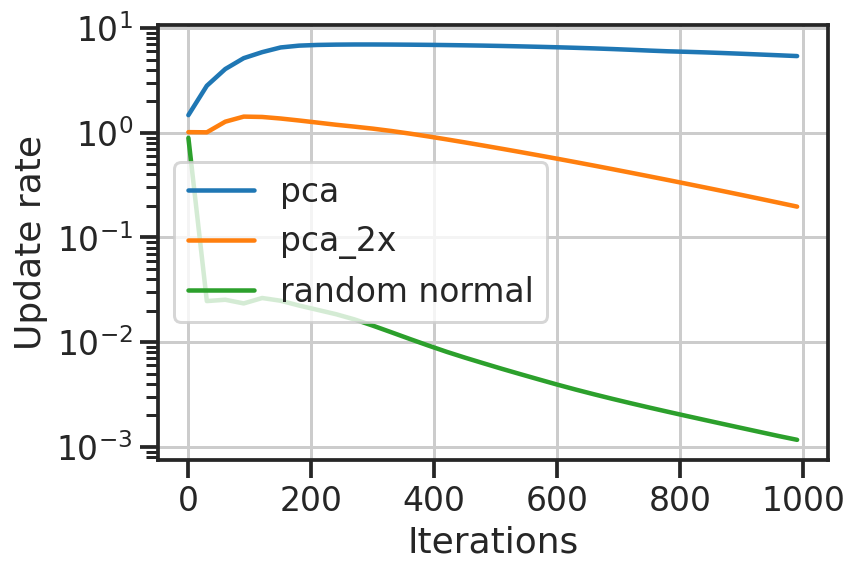

In [12]:
plt.plot(rec_pca[:,0], rec_pca[:,1], label='pca')
plt.plot(rec_p2x[:,0], rec_p2x[:,1], label='pca_2x')
plt.plot(rec_nrm[:,0], rec_nrm[:,1], label='random normal')
# plt.plot(rec_uni[:,0], rec_uni[:,1], label='random uniform')
plt.xlabel('Iterations')
plt.ylabel('Update rate')
plt.legend()
plt.yscale('log')
# plt.xscale('log')

In [13]:
def plot(w, ax, vmax=None, reorder=True):
    if reorder:
        wnew, rows, cols = basicu.diag_matrix_rows(w)
    else:
        wnew = w
        
    sns.heatmap(
                # np.log10(wnew+1), 
                wnew,
                ax=ax, 
                cmap='rocket_r', 
                cbar_kws=dict(shrink=0.5),
                vmax=vmax,
               )

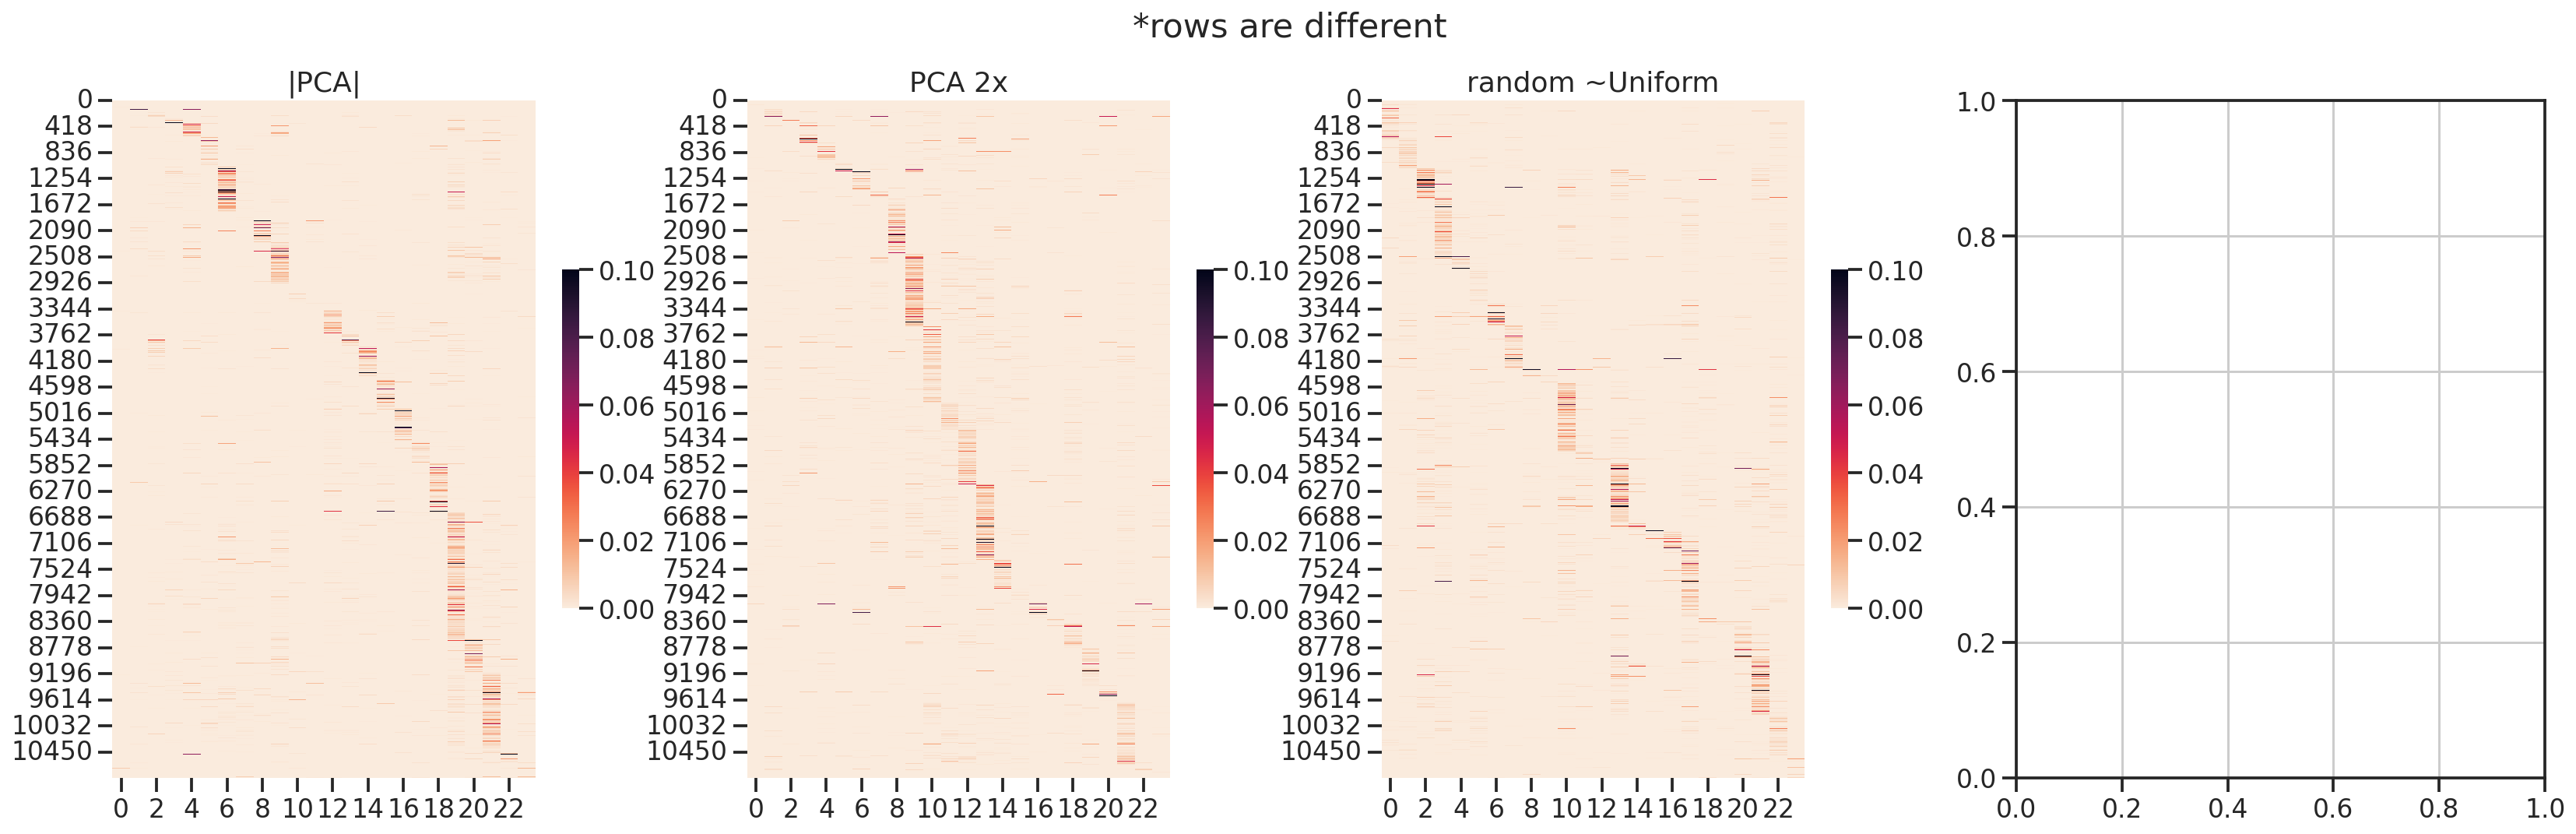

In [15]:
vmax = 0.1
# vmax = 0.03
fig, axs = plt.subplots(1, 4, figsize=(7*4,8))
ax = axs[0]
plot(w_pca, ax, vmax=vmax)
ax.set_title('|PCA|')

ax = axs[1]
plot(w_p2x, ax, vmax=vmax)
ax.set_title('PCA 2x')

ax = axs[2]
plot(w_nrm, ax, vmax=vmax)
ax.set_title('random |~Normal|')

# ax = axs[3]
# plot(w_uni, ax, vmax=vmax)
ax.set_title('random ~Uniform')
fig.suptitle('*rows are different')
plt.show()

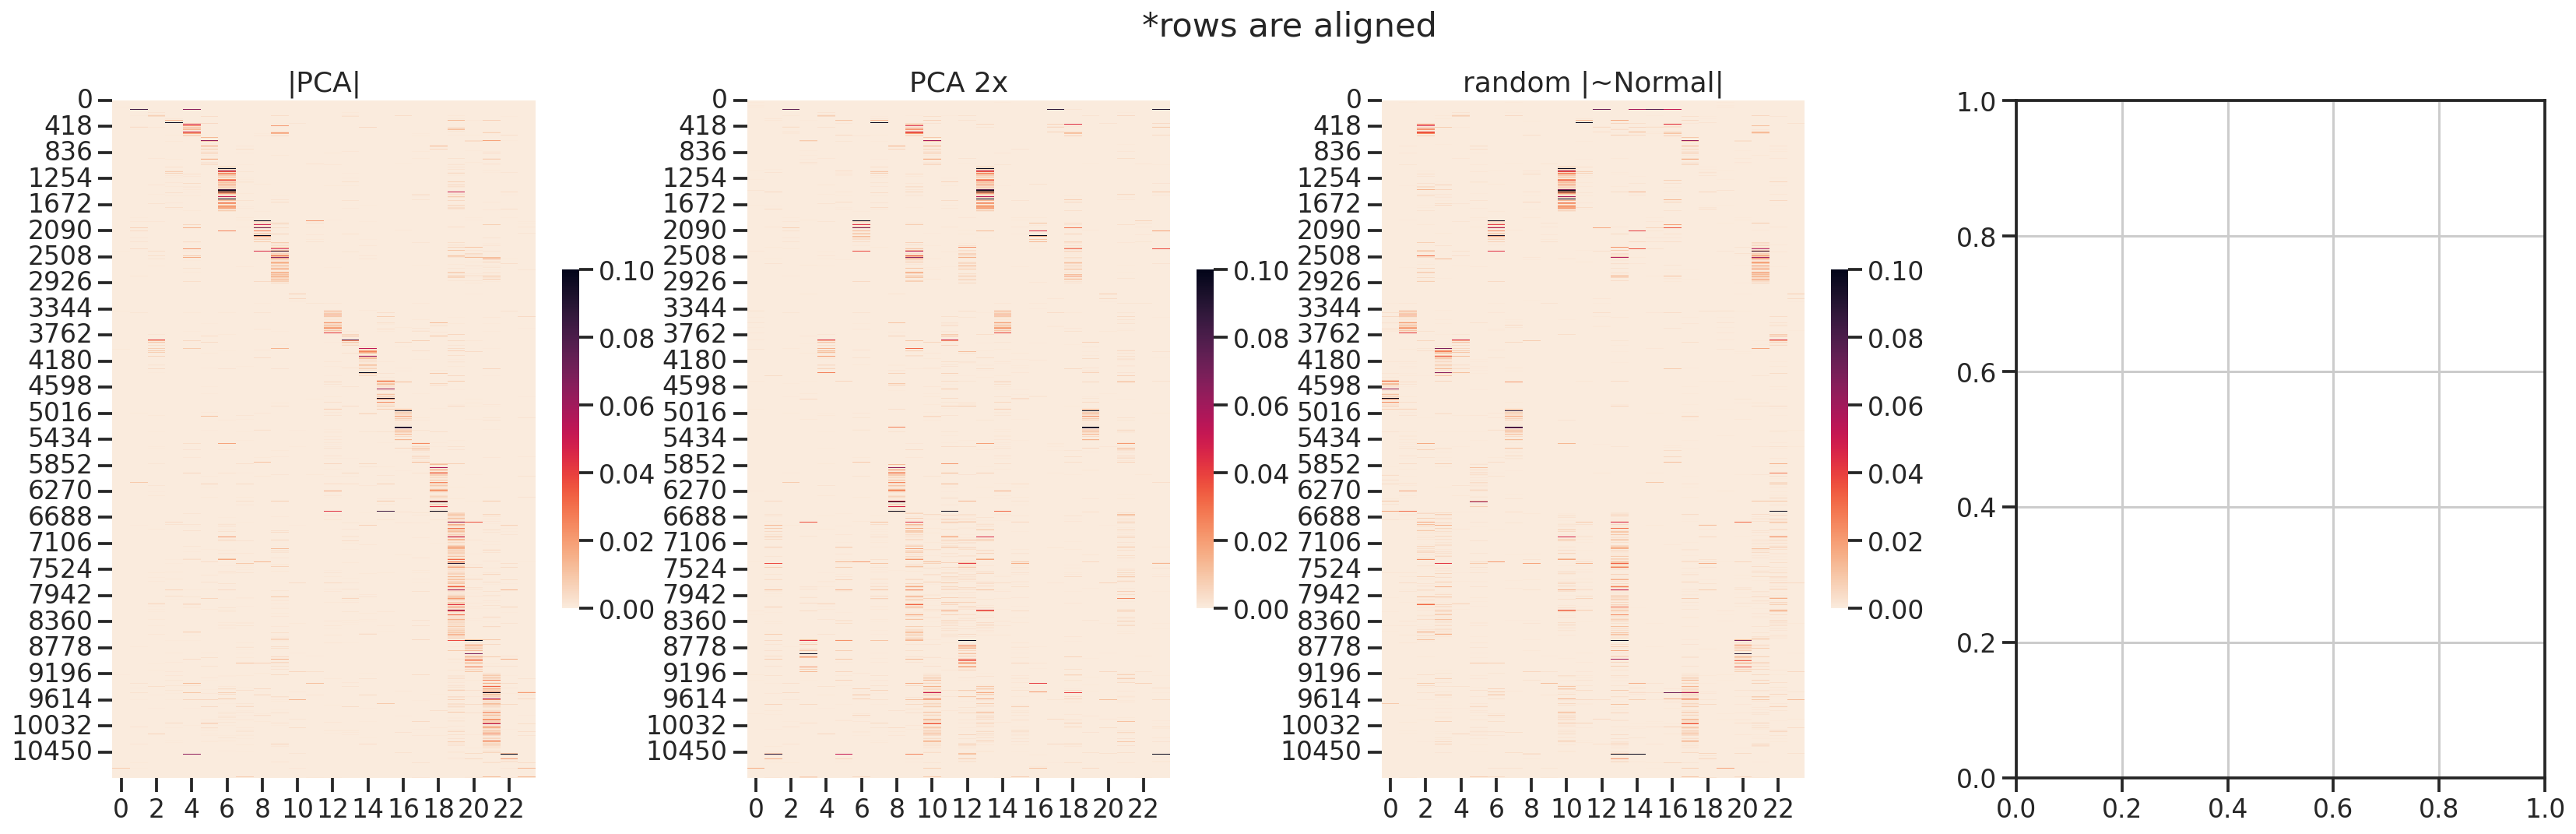

In [17]:
vmax = 0.1
# vmax = 0.03
# set the order
wnew, rows, cols = basicu.diag_matrix_rows(w_pca)
# wnew, rows, cols = basicu.diag_matrix_rows(w_p2x)

fig, axs = plt.subplots(1, 4, figsize=(7*4,8))
ax = axs[0]
wnew = w_pca[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('|PCA|')

ax = axs[1]
wnew = w_p2x[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('PCA 2x')

ax = axs[2]
wnew = w_nrm[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('random |~Normal|')

# ax = axs[3]
# wnew = w_uni[rows]
# plot(wnew, ax, vmax=vmax, reorder=False)
# ax.set_title('random ~Uniform')

fig.suptitle('*rows are aligned')
plt.show()

# save and validate these


In [18]:
output = os.path.join(res_dir, "smrt_X_v0-2.h5ad")
res_adata = anndata.AnnData(w_pca)
res_adata.layers['w_pca'] = w_pca
res_adata.layers['w_p2x'] = w_p2x
res_adata.layers['w_nrm'] = w_nrm
# res_adata.layers['w_uni'] = w_uni
res_adata

AnnData object with n_obs × n_vars = 10861 × 24
    layers: 'w_pca', 'w_p2x', 'w_nrm'

In [19]:
res_adata.write(output)

In [20]:
b = anndata.read(output)
b

AnnData object with n_obs × n_vars = 10861 × 24
    layers: 'w_nrm', 'w_p2x', 'w_pca'

In [21]:
f = os.path.join(res_dir, "smrt_X_v1.h5ad")
b = anndata.read(f)
b

AnnData object with n_obs × n_vars = 10861 × 24
    layers: 'w_nrm', 'w_p2x', 'w_pca', 'w_uni'

In [22]:
w_pca = b.layers['w_pca']
w_p2x = b.layers['w_p2x']
w_nrm = b.layers['w_nrm']
w_uni = b.layers['w_uni']

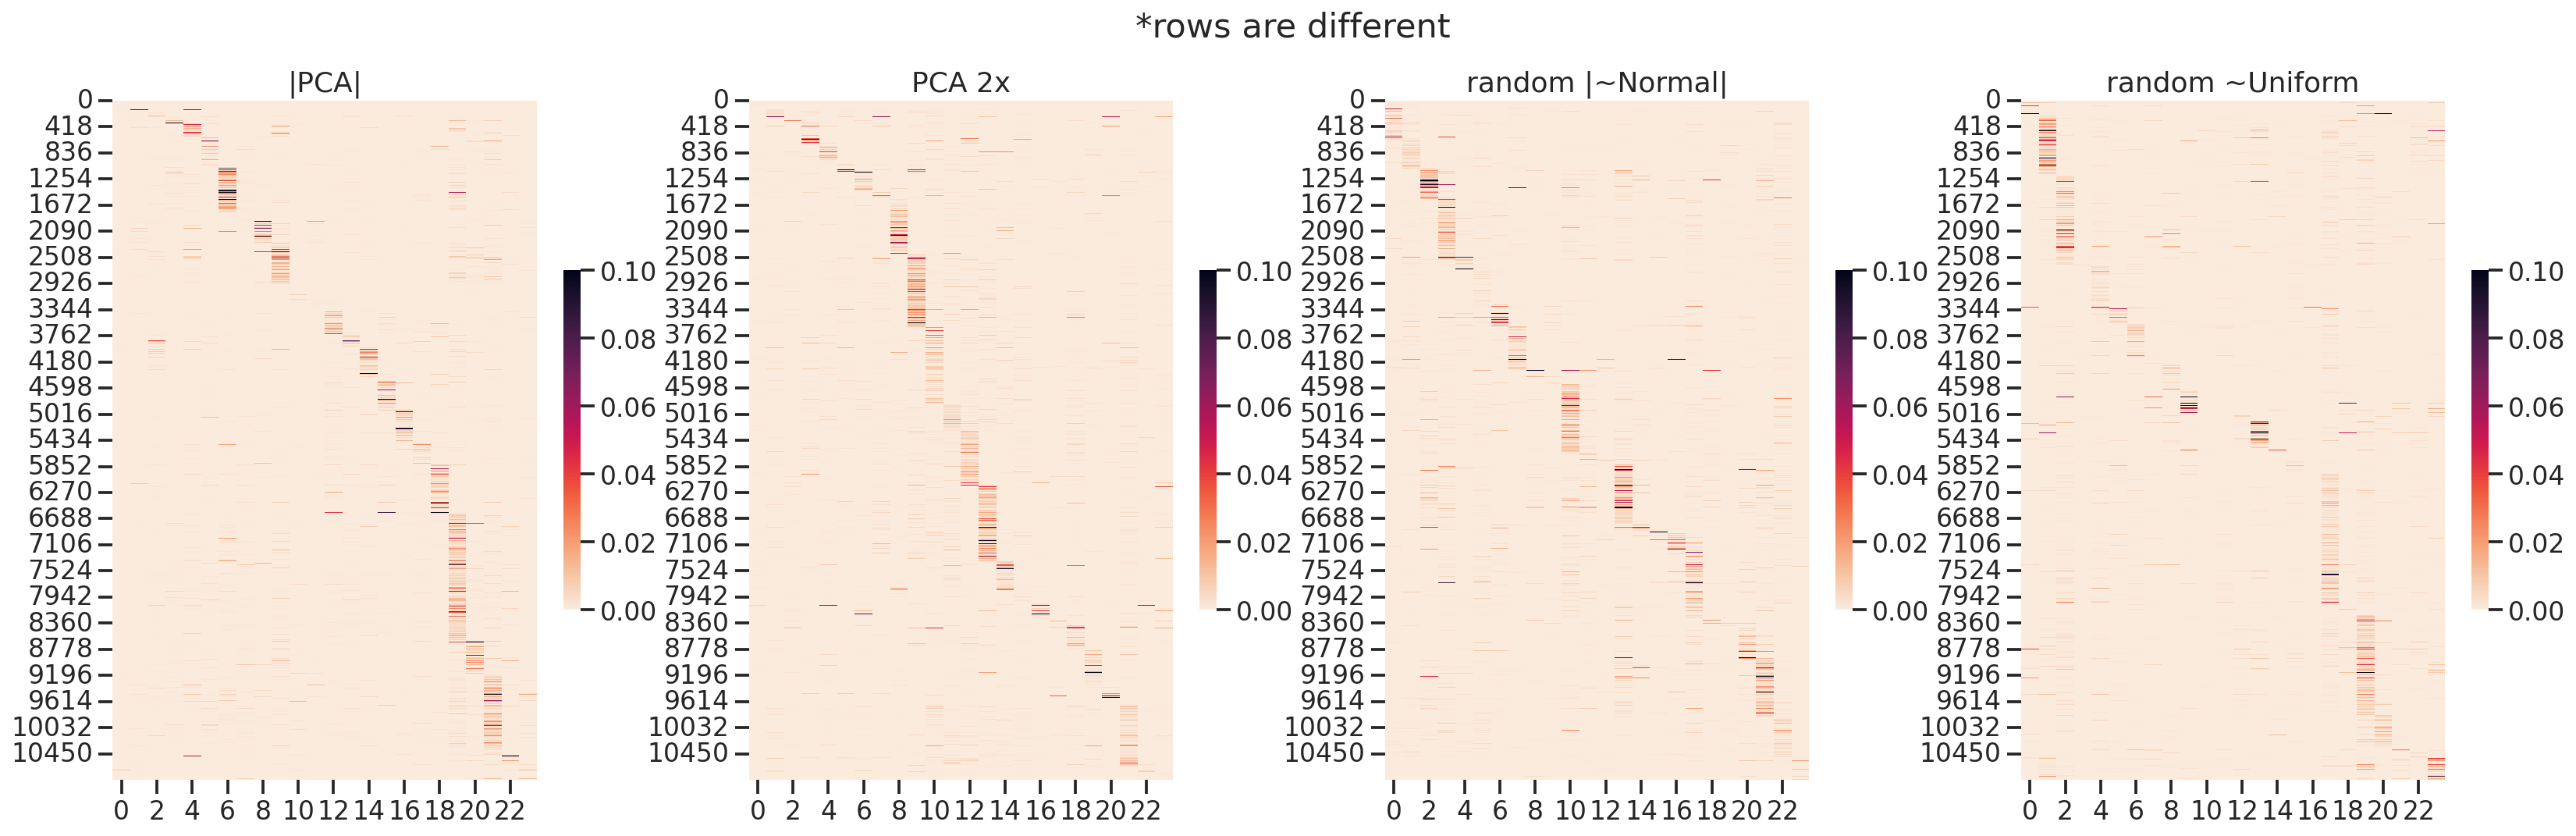

In [25]:
vmax = 0.1
# vmax = 0.03
fig, axs = plt.subplots(1, 4, figsize=(7*4,8))
ax = axs[0]
plot(w_pca, ax, vmax=vmax)
ax.set_title('|PCA|')

ax = axs[1]
plot(w_p2x, ax, vmax=vmax)
ax.set_title('PCA 2x')

ax = axs[2]
plot(w_nrm, ax, vmax=vmax)
ax.set_title('random |~Normal|')

ax = axs[3]
plot(w_uni, ax, vmax=vmax)
ax.set_title('random ~Uniform')
fig.suptitle('*rows are different')
plt.show()

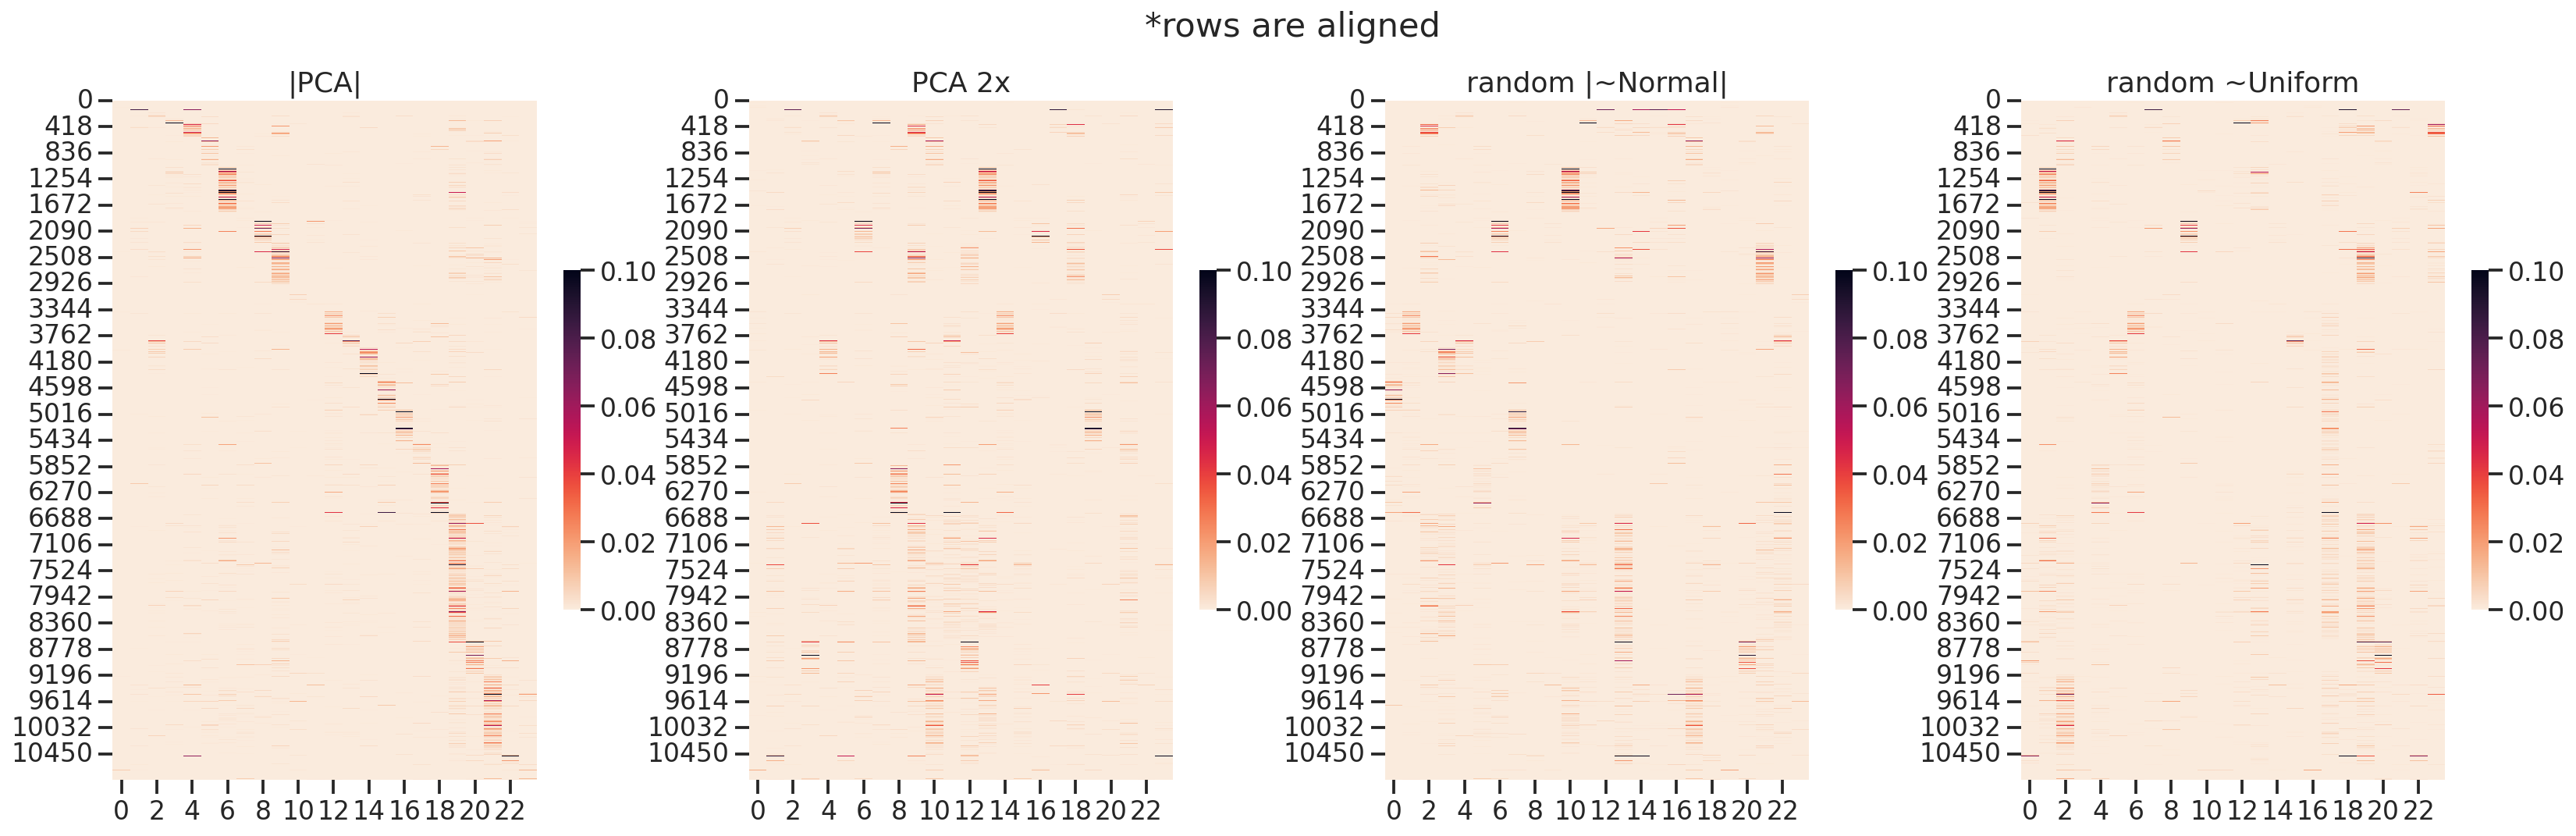

In [24]:
vmax = 0.1
# vmax = 0.03
# set the order
wnew, rows, cols = basicu.diag_matrix_rows(w_pca)
# wnew, rows, cols = basicu.diag_matrix_rows(w_p2x)

fig, axs = plt.subplots(1, 4, figsize=(7*4,8))
ax = axs[0]
wnew = w_pca[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('|PCA|')

ax = axs[1]
wnew = w_p2x[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('PCA 2x')

ax = axs[2]
wnew = w_nrm[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('random |~Normal|')

ax = axs[3]
wnew = w_uni[rows]
plot(wnew, ax, vmax=vmax, reorder=False)
ax.set_title('random ~Uniform')

fig.suptitle('*rows are aligned')
plt.show()